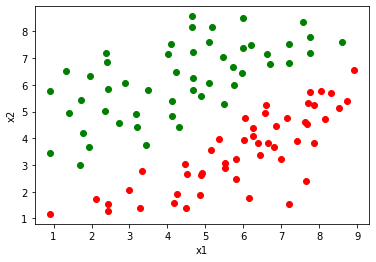

In [10]:
#1-5
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('data1.csv')
X = np.array(df['x1'] + df['x2'])
y = np.array(df['y'])
plt.scatter(df[y == 0]['x1'], df[y == 0]['x2'], label = 'Class1',color='green')
plt.scatter(df[y == 1]['x1'], df[y == 1]['x2'], label = 'Class2',color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

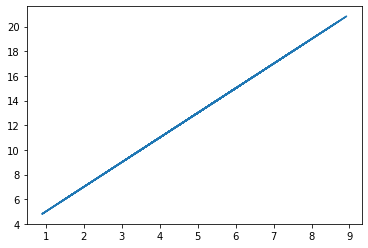

In [11]:
def y(x):
    return 2*x+3
plt.plot(df['x1'],y(df['x1']))

In [12]:
def sigmoid(z):
    if z.all() < 0 :
        return np.exp(z)/(1 + np.exp(z))
    else:
        return 1 / (1 + np.exp(-z))
V = np.random.randint(-1000, 1000, size=10)
V1 = sigmoid(V)

<ipython-input-12-d2dc0c57c90b>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [13]:
def hypothesis(theta, X):
    if sigmoid(np.dot(theta, X)) > 0.5:
        print(0)
    else:
        print(1)
def cost(theta, X, y):
    return(-y * np.log(hypothesis(theta, X)) - (1-y) * np.log(1-hypothesis(theta, X))).mean()

In [15]:
#6-7
from pandas import read_csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = read_csv('loan_data.csv')
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


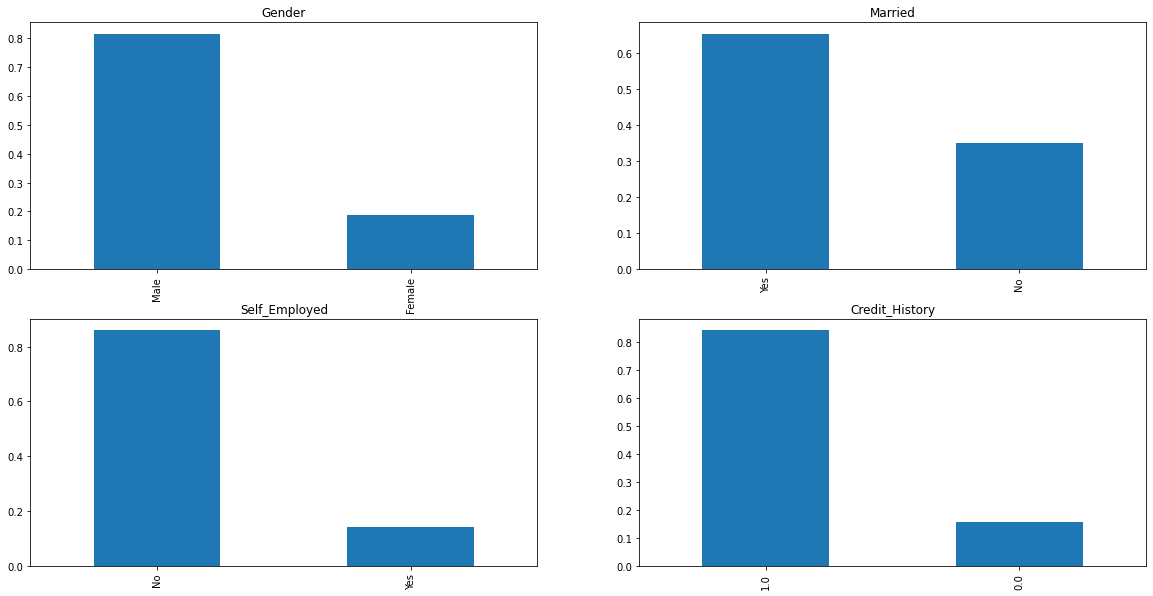

In [22]:
data_backup = data.copy()
train = data
train['Loan_Status'].value_counts(normalize=True).plot.bar()
plt.figure(1)
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

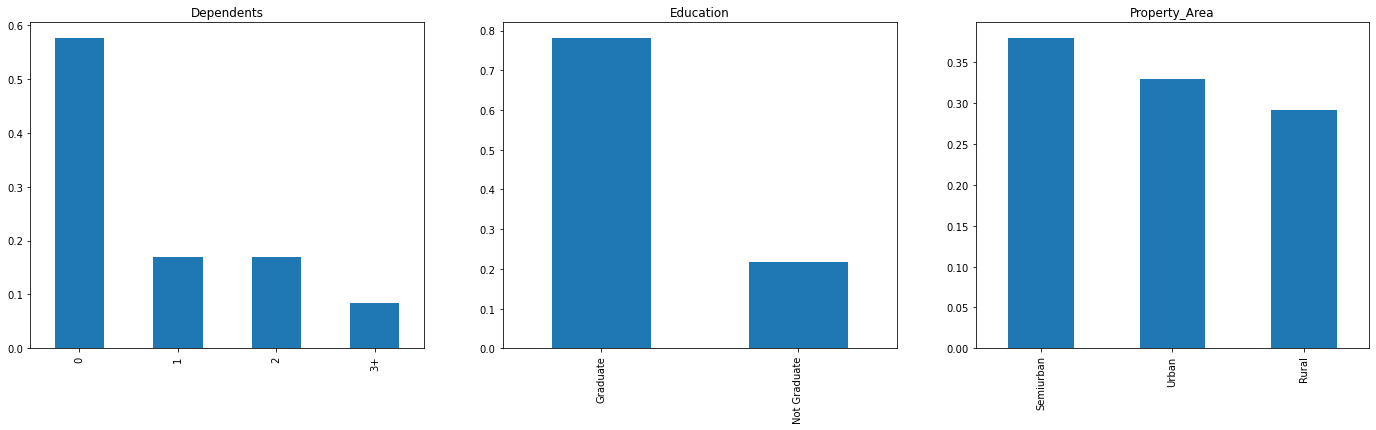

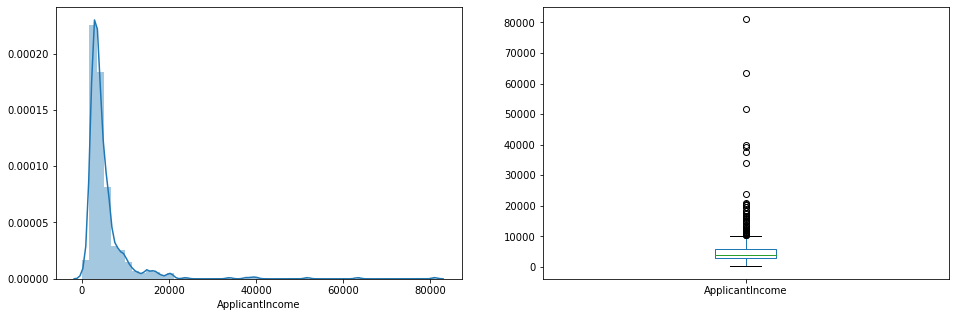

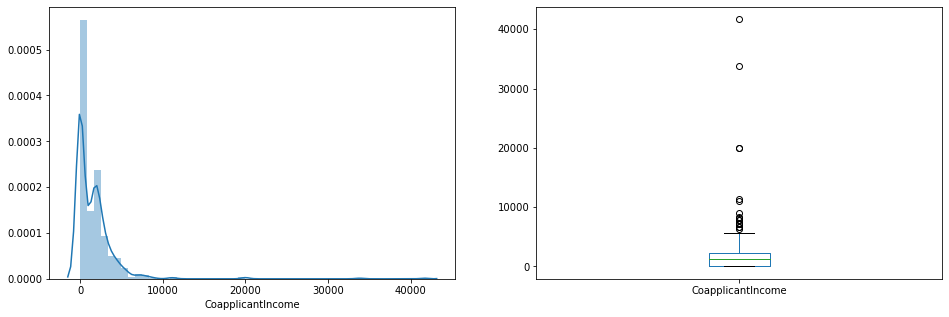

In [25]:
plt.figure(1)
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 


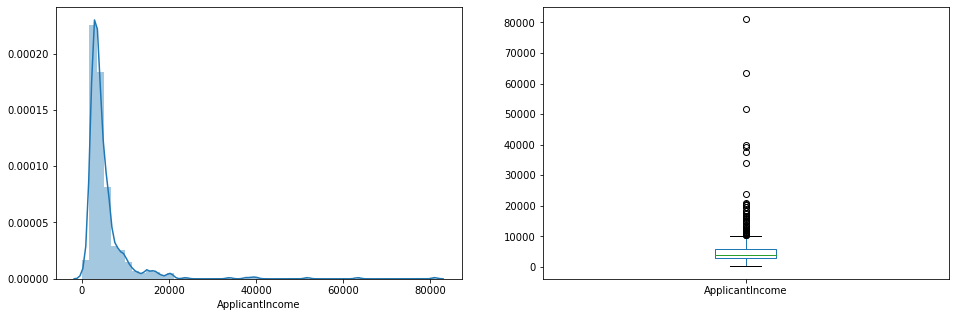

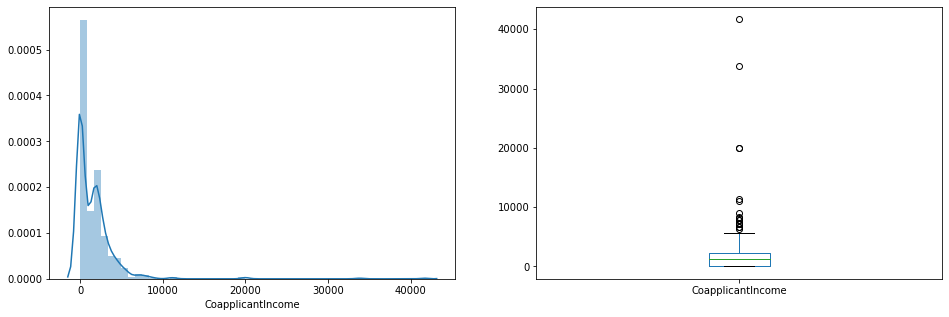

In [26]:
plt.show()
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

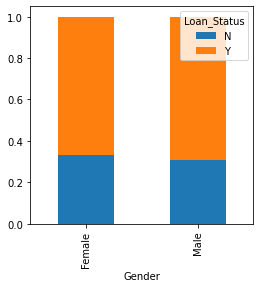

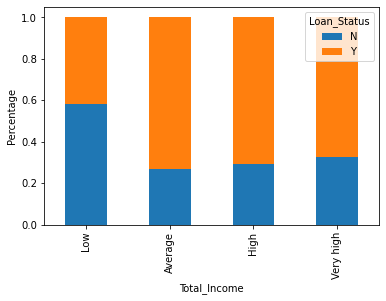

In [27]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')